In [2]:
# Import packages
# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Numpy
import numpy as np

# Tensorflow
import tensorflow as tf

# Keras
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Sci-kit Learn
from sklearn.metrics import confusion_matrix, classification_report

# Data Preprocessing


In [6]:
# Load CIFAR-10 dataset
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
# Check X_train shape
X_train.shape

(50000, 32, 32, 3)

In [8]:
# Check X_test shape
X_test.shape

(10000, 32, 32, 3)

In [9]:
# Reshape y_train so labels and images correspond correctly
y_train = to_categorical(y_train.reshape(-1), 10)
y_test = to_categorical(y_test.reshape(-1), 10)

In [10]:
# Check y_train after reshape
y_train.shape[:5]

(50000, 10)

In [11]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
# Create function to plot any given image sample
def plot_sample(X, y, index):
    plt.figure(figsize=(15,3))
    plt.imshow(X_train[index])
    plt.xlabel(class_names[np.argmax(y[index])])

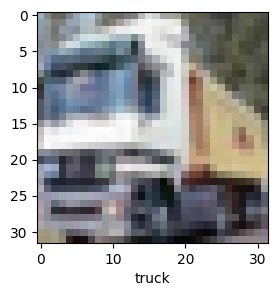

In [13]:
plot_sample(X_train, y_train, 1)

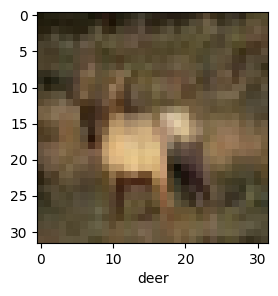

In [14]:
plot_sample(X_train, y_train, 3)

In [15]:
# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [16]:
# Fit Data Generator to Training Data
datagen.fit(X_train)

In [17]:
# Verify Shapes Before Training
print(f"x_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [18]:
# Normalize images to be between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

# Model Architecture

In [19]:
# Create a baseline CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
# Compile model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Fit model and train
cnn.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.2702 - loss: 1.9459 - val_accuracy: 0.4720 - val_loss: 1.4583
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4393 - loss: 1.5415 - val_accuracy: 0.5409 - val_loss: 1.2657
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.4897 - loss: 1.4269 - val_accuracy: 0.5848 - val_loss: 1.1699
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5222 - loss: 1.3398 - val_accuracy: 0.5962 - val_loss: 1.1460
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.5464 - loss: 1.2731 - val_accuracy: 0.6107 - val_loss: 1.1118
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5642 - loss: 1.2326 - val_accuracy: 0.6525 - val_loss: 0.9891
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.5797 - loss: 1.1917 - val_accuracy: 0.6532 - val_loss: 0.9797
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5921 - loss: 1.1643 - val_accurac

In [22]:
# Evaluate Model
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.6520 - loss: 0.9948
Test accuracy: 0.6520


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


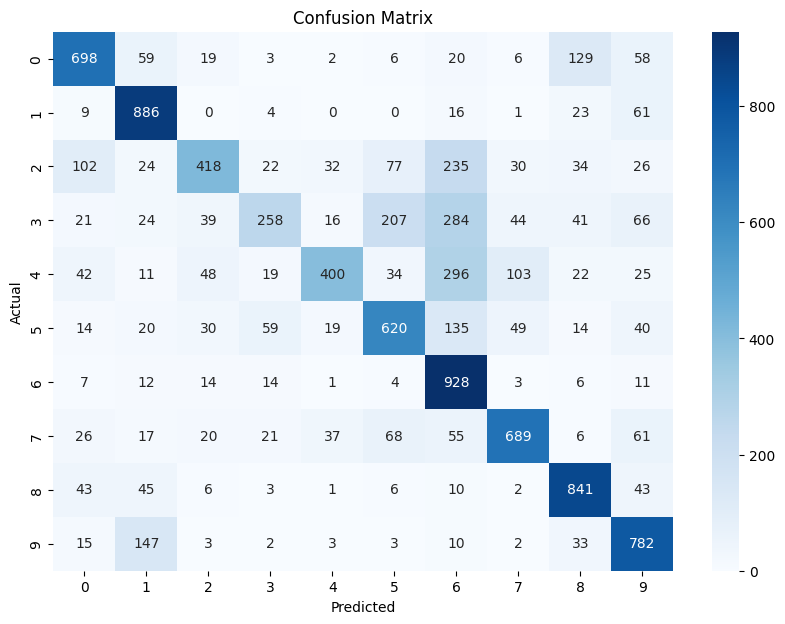

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.71      0.89      0.79      1000
           2       0.70      0.42      0.52      1000
           3       0.64      0.26      0.37      1000
           4       0.78      0.40      0.53      1000
           5       0.60      0.62      0.61      1000
           6       0.47      0.93      0.62      1000
           7       0.74      0.69      0.71      1000
           8       0.73      0.84      0.78      1000
           9       0.67      0.78      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.64     10000
weighted avg       0.68      0.65      0.64     10000



In [23]:
# Predict on test data
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print(classification_report(y_true_classes, y_pred_classes))

# Transfer Learning

In [24]:
# Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the first layers, but fine-tune the last two convolutional blocks
for layer in base_model.layers[:10]:  # Freeze first 10 layers
    layer.trainable = False
for layer in base_model.layers[10:]:  # Fine-tune last two blocks
    layer.trainable = True

# Add New Fully Connected Layers on Top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)  # Reduced dropout
x = layers.Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

# Create Model
model = Model(inputs=base_model.input, outputs=x)

# Compile Model with a Lower Learning Rate for Fine-Tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display Model Summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 14,849,610 (56.65 MB)

 Trainable params: 13,113,610 (50.02 MB)

 Non-trainable params: 1,736,000 (6.62 MB)

# Model Training

In [27]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train Model with Data Augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=75,  # Increase training time
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6357 - loss: 1.2037 - val_accuracy: 0.7257 - val_loss: 0.9421 - learning_rate: 1.0000e-05
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6589 - loss: 1.1275 - val_accuracy: 0.7163 - val_loss: 0.9765 - learning_rate: 1.0000e-05
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6757 - loss: 1.0701 - val_accuracy: 0.7525 - val_loss: 0.8494 - learning_rate: 1.0000e-05
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6928 - loss: 1.0233 - val_accuracy: 0.7517 - val_loss: 0.8624 - learning_rate: 1.0000e-05
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7053 - loss: 0.9746 - val_accuracy: 0.7436 - val_loss: 0.8560 - learning_rate: 1.0000e-05
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7104 - loss: 0.9457 - val_accuracy: 0.7607 - val_loss: 0.8097 - learning_rate: 1.0000e-05
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/ste

# Model Evaluation

In [28]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.8304 - loss: 0.5735
Test accuracy: 0.8304


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


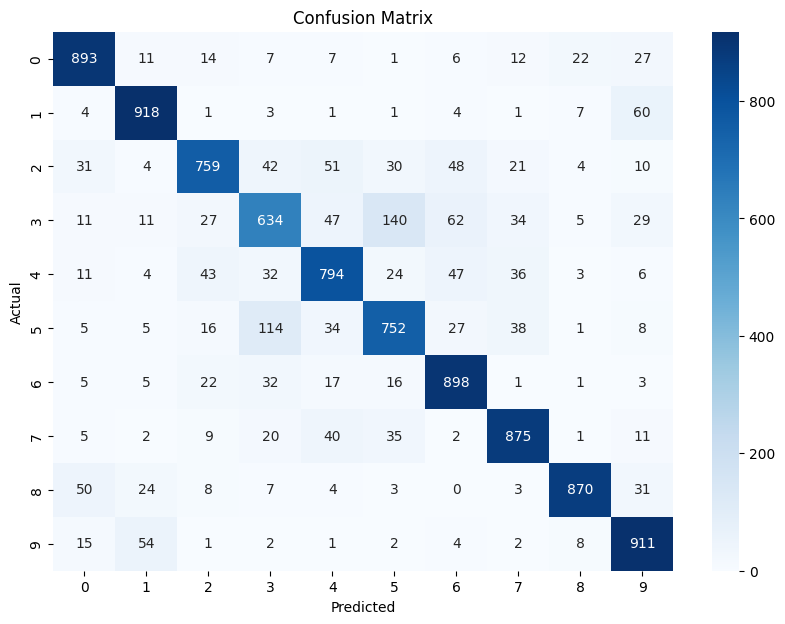

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.88      0.92      0.90      1000
           2       0.84      0.76      0.80      1000
           3       0.71      0.63      0.67      1000
           4       0.80      0.79      0.80      1000
           5       0.75      0.75      0.75      1000
           6       0.82      0.90      0.86      1000
           7       0.86      0.88      0.87      1000
           8       0.94      0.87      0.91      1000
           9       0.83      0.91      0.87      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [30]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print(classification_report(y_true_classes, y_pred_classes))

# Model Deployment

In [34]:
# Save chosen model in format for tensorflow serving
tf.saved_model.save(model, 'saved_model/final_model')

In [35]:
import os
print("SavedModel directory:", os.path.abspath('saved_model/final_model'))
print("Contents:", os.listdir('saved_model/final_model'))


SavedModel directory: /content/saved_model/final_model
Contents: ['assets', 'fingerprint.pb', 'variables', 'saved_model.pb']


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
!cp -r saved_model/final_model /content/drive/MyDrive/